In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd '/content/drive/My Drive'

/content/drive/My Drive/ITAú/TCC


In [0]:
%load_ext autoreload
%autoreload 2

from core.utils import *

In [0]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

## Importing structures

Structures containing images info (pandas.DataFrame) and segments localizations (dict) collected from SHP file

In [0]:
with open('./img_polygons_mainroads.txt', 'rb') as handle:
  img_polygons = pickle.loads(handle.read())
  
with open('./df_img_info.pkl', 'rb') as handle:
  df_img_info = pickle.loads(handle.read())

In [0]:
df_img_info.head()

,x-scale,x-rotation,y-rotation,y-scale,x_first_pixel,y_first_pixel,x_last_pixel,y_last_pixel
001.jgw,0.25,0.0,0.0,-0.25,324000.0,9166000.0,325999.75,9164000.25
002.jgw,0.25,0.0,0.0,-0.25,322000.0,9166000.0,323999.75,9164000.25
003.jgw,0.25,0.0,0.0,-0.25,322000.0,9168000.0,323999.75,9166000.25
004.jgw,0.25,0.0,0.0,-0.25,324000.0,9168000.0,325999.75,9166000.25
005.jgw,0.25,0.0,0.0,-0.25,322000.0,9170000.0,323999.75,9168000.25


In [0]:
img_polygons['007.jgw']

[[(322000.1013072497, 9173070.116213528),
  (322036.8617427876, 9173031.222946702),
  (322067.0538259446, 9172999.708589315),
  (322101.0824193397, 9172964.525920693),
  (322145.494215195, 9172918.415871968),
  (322195.4228171777, 9172866.314372111),
  (322220.6106776285, 9172839.802264834),
  (322253.8520029079, 9172806.202218747),
  (322285.7121603003, 9172773.187169809),
  (322338.657211651, 9172717.087157015),
  (322373.3774780479, 9172681.664889809),
  (322422.6234825142, 9172629.753681272),
  (322484.9268114958, 9172565.2626801),
  (322530.6320455451, 9172517.240880838),
  (322584.3934065651, 9172460.97419795),
  (322641.8170285017, 9172401.544582559),
  (322727.2701059032, 9172313.083812432),
  (322782.716240052, 9172255.798773639),
  (322810.5731402859, 9172226.785623902),
  (322862.4942348591, 9172172.011703761),
  (322911.0754297608, 9172122.093103059),
  (322979.4285983848, 9172050.026624152),
  (323010.7652817733, 9172015.886097848),
  (323024.1098756564, 9171999.878831428)

## Transform coordinates to pixel

### Test with image '007.jgw'

In [0]:
pxl_polygon = []
for polygon in img_polygons['007.jgw']:
  coords = []
  for coord in polygon:
    coords.append(tuple(coordinate2pixel(coord, df_img_info.loc['007.jgw']).reshape(1, -1).astype(int)[0]))
  pxl_polygon.append(coords)

In [0]:
pxl_polygon

[[(0, -4280),
  (147, -4125),
  (268, -3999),
  (404, -3858),
  (582, -3674),
  (782, -3465),
  (882, -3359),
  (1015, -3225),
  (1143, -3093),
  (1355, -2868),
  (1494, -2727),
  (1690, -2519),
  (1940, -2261),
  (2123, -2069),
  (2338, -1844),
  (2567, -1606),
  (2909, -1252),
  (3131, -1023),
  (3242, -907),
  (3450, -688),
  (3644, -488),
  (3918, -200),
  (4043, -64),
  (4096, 0)],
 [(4096, 0),
  (4145, 60),
  (4219, 154),
  (4287, 238),
  (4367, 338),
  (4454, 440),
  (4517, 520),
  (4615, 649),
  (4724, 790),
  (4808, 894),
  (4860, 957),
  (4933, 1051),
  (4977, 1104),
  (5065, 1221),
  (5182, 1373),
  (5333, 1572),
  (5388, 1633),
  (5466, 1721),
  (5523, 1776),
  (5593, 1846),
  (5664, 1907),
  (5716, 1949),
  (5824, 2027),
  (5913, 2086),
  (6048, 2169),
  (6138, 2218),
  (6274, 2280),
  (6348, 2310),
  (6475, 2356),
  (6557, 2380),
  (6694, 2413),
  (6804, 2432),
  (6917, 2452),
  (7017, 2459),
  (7144, 2463),
  (7346, 2463),
  (7593, 2450),
  (7775, 2435),
  (7999, 2396)],

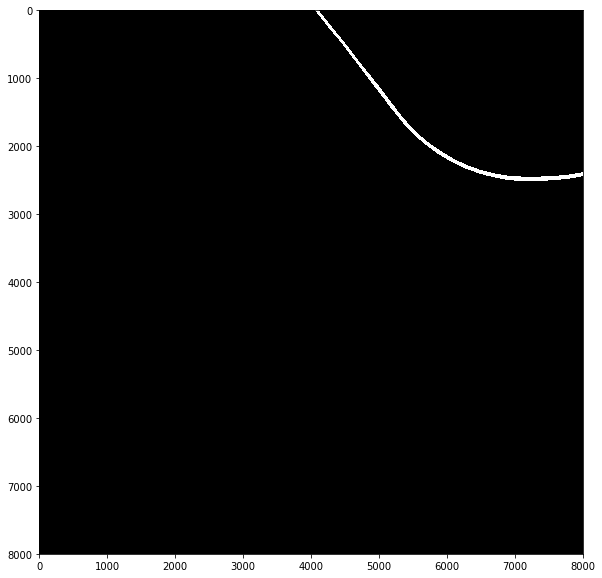

In [0]:
mask = np.zeros((8000,8000,3), np.uint8)
for points in pxl_polygon:
  pts = np.array(points, np.int32)
  pts = pts.reshape((-1,1,2))
  cv2.polylines(mask,[pts],False, (255,255,255), thickness = 50);

kernel = np.ones((5,5),np.uint8)
mask = cv2.erode(mask,kernel,iterations = 6)
plt.figure(figsize=(20,10))
plt.imshow(mask)

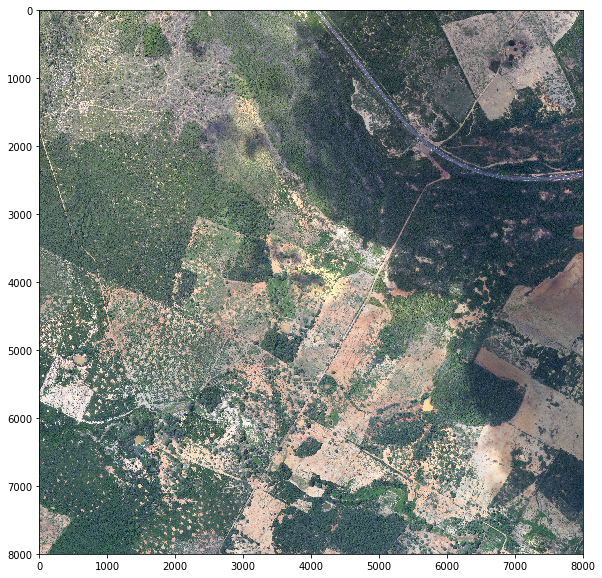

In [0]:
img = cv2.imread("007.jpg")


plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

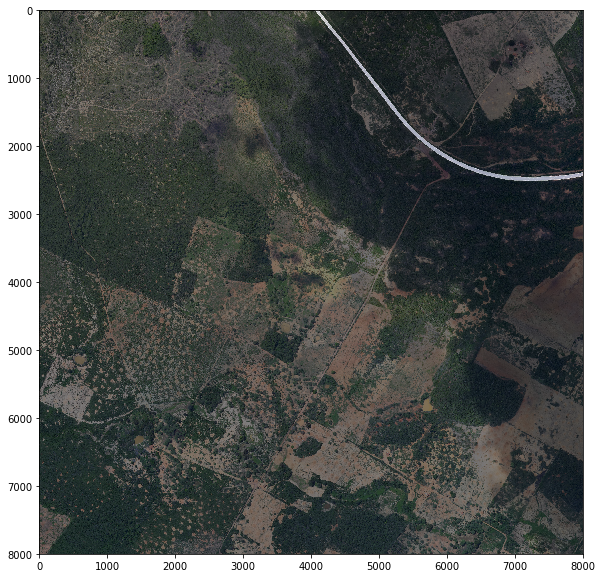

In [0]:
# overlay = img.copy()
# for points in pxl_polygon:
#   pts = np.array(points, np.int32)
#   pts = pts.reshape((-1,1,2))
#   cv2.polylines(overlay,[pts], False, (0, 255, 0), thickness = 40);

opacity = 0.5
cv2.addWeighted(mask, opacity, img, 1 - opacity, 0, img)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [0]:
cv2.imwrite('./test_mask_mainroad.jpg', img)

True

### Transforming all coordinates to pixel

In [0]:
from tqdm import tqdm

In [0]:
img_polygons_pxl = {}

for index in tqdm(img_polygons.keys()):
  pxl_polygon = []
  for polygon in img_polygons[index]:
    coords = []
    for coord in polygon:
      coords.append(tuple(coordinate2pixel(coord, df_img_info.loc[index]).reshape(1, -1).astype(int)[0]))
    pxl_polygon.append(coords)
  img_polygons_pxl[index] = pxl_polygon

100%|██████████| 566/566 [00:03<00:00, 171.50it/s]


## Creating Masks

In [0]:
kernel = np.ones((5,5),np.uint8)

for name, polygons in tqdm(img_polygons_pxl.items()):
    mask = np.zeros((8000,8000,3), np.uint8)
    for points in polygons:
        pts = np.array(points, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(mask,[pts], False, (255,255,255), thickness = 50);
    
    mask = cv2.erode(mask,kernel,iterations = 6)
    cv2.imwrite('./masks/Chapada/vias principais/'+name.split('.')[0]+'.jpg', mask)

100%|██████████| 566/566 [08:30<00:00,  1.13it/s]
